# 14.3 Exercises

## Exercise 1: Preparation and data exploration

The code below already loads the dataset and the packages we use today. The `Oxboys` dataset consists of longitudinal height measurements for boys from Oxford, UK. Our goal for today is to predict `height` by `age`. The dataset contains the following variables:

- `Subject` - Unique identifier for each boy in the experiment
- `age` - The standardized age 
- `height` - The height of the boy in cm
- `Occasion` - Tthe result of converting age from a continuous variable to a categorical one (can be ignored)

Inspect the dataset. Perform z-standardization on the `height` variable an inspect the dataset again.


In [13]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = sm.datasets.get_rdataset("Oxboys", "nlme").data

##solution

# Inspect dataset
print(data)

# Z-standardize the `height` variable
data['height'] = (data['height'] - data['height'].mean()) / data['height'].std()

# Inspect dataset again
print(data)

     Subject     age  height  Occasion
0          1 -1.0000   140.5         1
1          1 -0.7479   143.4         2
2          1 -0.4630   144.8         3
3          1 -0.1643   147.1         4
4          1 -0.0027   147.7         5
..       ...     ...     ...       ...
229       26 -0.0027   138.4         5
230       26  0.2466   138.9         6
231       26  0.5562   141.8         7
232       26  0.7781   142.6         8
233       26  1.0055   143.1         9

[234 rows x 4 columns]
     Subject     age    height  Occasion
0          1 -1.0000 -0.990794         1
1          1 -0.7479 -0.672225         2
2          1 -0.4630 -0.518433         3
3          1 -0.1643 -0.265775         4
4          1 -0.0027 -0.199864         5
..       ...     ...       ...       ...
229       26 -0.0027 -1.221481         5
230       26  0.2466 -1.166556         6
231       26  0.5562 -0.847987         7
232       26  0.7781 -0.760106         8
233       26  1.0055 -0.705180         9

[234 rows x 4 c

## Exercise 2: Data visualization

To get a better feeling for the data, create two plots. The first plot should show a regression line for all subjects combined. The second plot should show a regression line for each subjects (for 10 randomly selected subjects). See chapter 10.1 if the task is not clear.

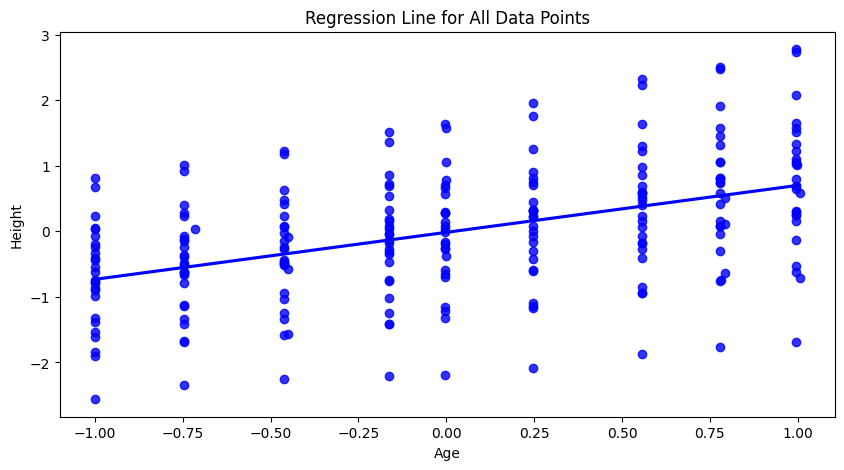

<Figure size 1000x500 with 0 Axes>

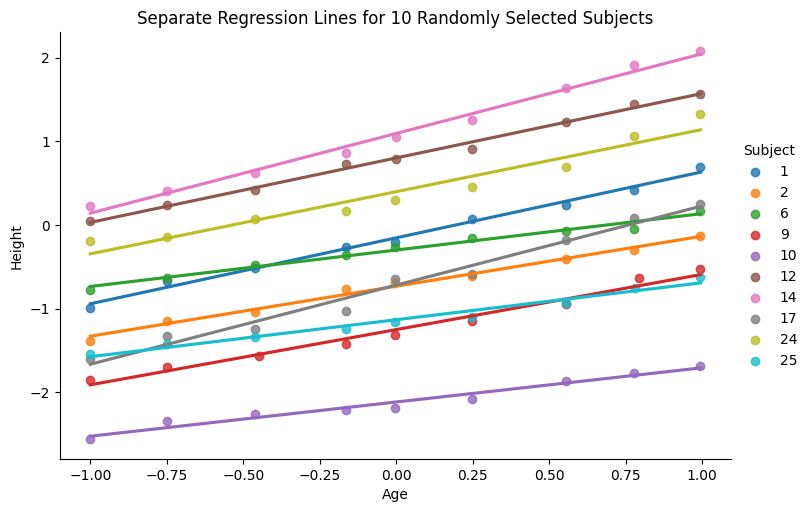

In [2]:
## solution

plt.figure(figsize=(10, 5))
sns.regplot(x='age', y='height', data=data, ci=None, color='blue')
plt.title("Regression Line for All Data Points")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()

selected_subj = data['Subject'].drop_duplicates().sample(10, random_state=42)
data_subset = data[data['Subject'].isin(selected_subj)]

plt.figure(figsize=(10, 5))
sns.lmplot(x='age', y='height', hue='Subject', data=data_subset, ci=None, aspect=1.5)
plt.title("Separate Regression Lines for 10 Randomly Selected Subjects")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()

Do you think multilevel modeling is needed in this case? Are the slopes and/or intercepts variying accross subjects?

## Exercise 3: Fit a null model

To find out how much variance in `height` is explained by `Subject` we begin by fitting a null model without any predictors. Set up the model and inspect the model output. To further analyze the data, calculate the ICC and interpret it. Which model parameter indicates the amount of variance in the intercept?

In [3]:
##solution

model1 = smf.mixedlm("height ~ 1", data, groups=data["Subject"])
model1_fit = model1.fit(method="bfgs")
print(model1_fit.summary())

def get_icc(results):
    '''get the Intraclass Correlation Coefficient (ICC)'''
    icc = results.cov_re / (results.cov_re + results.scale)
    
    return icc.values[0, 0]

icc = get_icc(model1_fit)
print(icc)

# The `Group Var` row in the output show the variance of the intercept.
# 74.45% of the variance in `height` is explained by `Subject`. 

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: height   
No. Observations: 234     Method:             REML     
No. Groups:       26      Scale:              0.2622   
Min. group size:  9       Log-Likelihood:     -218.6848
Max. group size:  9       Converged:          Yes      
Mean group size:  9.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.000     0.175  0.000  1.000  -0.342   0.342
Group Var  0.764     0.464                              

0.744511776932317


## Exercise 4: Fit a random intercept model

As seen in the null model, there is a lot of variance explained by the grouping variable `Subject`. Therefore, fitting one regression over all datapoints may lead to wrong interpretations and we need the model to account for inter-individual differences. To do so, please fit a random intercept model, predicting `height` with `age`. What is the average relationship between `age` and `height`?

In [ ]:
##solution

model2 = smf.mixedlm("height ~ age", data, groups=data["Subject"])
model2_fit = model2.fit(method="bfgs")
print(model2_fit.summary())

# The average relationship between `age` and `height` is 0.717. For a one-unit (i.e. 1SD) increase in `age`, `height` is expected to increase by 0.717 SDs.

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: height 
No. Observations: 234     Method:             REML   
No. Groups:       26      Scale:              0.0207 
Min. group size:  9       Log-Likelihood:     42.3866
Max. group size:  9       Converged:          Yes    
Mean group size:  9.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept  -0.016    0.175 -0.093 0.926 -0.359  0.326
age         0.717    0.015 49.228 0.000  0.688  0.745
Group Var   0.791    1.650                           



## Exercise 5: Fit a random intercept - random slope model

To increase the flexibility in our model, we will now add random slopes as well, meaning that for every subject a random intecept and a random slope is fitted. Please specify the model and interpret the output.

In [ ]:
##solution

model3 = smf.mixedlm("height ~ age", data, groups=data["Subject"], re_formula="~age")
model3_fit = model3.fit(method="bfgs")
print(model3_fit.summary())

# The variance of the slope is 0.034, indicating that all subjects have very similar slopes (hence, there is very little variance). 
# The correlation between slope and intercept is 0.105, meaning subjects with a larger intercept tend to have a more positive/steeper slope.

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  height  
No. Observations:   234      Method:              REML    
No. Groups:         26       Scale:               0.0053  
Min. group size:    9        Log-Likelihood:      150.3560
Max. group size:    9        Converged:           Yes     
Mean group size:    9.0                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.016    0.174 -0.093 0.926 -0.358  0.325
age              0.717    0.037 19.404 0.000  0.644  0.789
Group Var        0.788    3.282                           
Group x age Cov  0.105    0.566                           
age Var          0.034    0.148                           



## Voluntary Exercise 1: Fit a random slope - fixed intercept model

Until now we either looked at random intercept - fixed slope models (only the intercepts vary accross subject) or at random intercept - random slope moddels (intercept and slope vary accross subects). However, it is also possible to fit fixed intercept - random slope models. Find out how to do it and specify such a model. There might be some warnings which refer to the model not converging. This is probably caused by the low variance in the slope (see above). The random effects in the model have very small or zero variance, indicating that the random effect might not be necessary or is poorly estimated. For now, you can ignore this warning. However, you should be very cautious when interpreting model estimates in case of convergence problems. What is different when looking at the output (compared to the random intercept - random slope model).

In [ ]:
##solution

model4 = smf.mixedlm("height ~ age", data, groups=data["Subject"], re_formula="~age - 1")
model4_fit = model4.fit()
print(model4_fit.summary())

# The is no estimate for the intercept variance. This is because we specified the intercept to be fixed.
# Consequently, there is also no estimate for the correlation between intercept and slope.

c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: height   
No. Observations: 234     Method:             REML     
No. Groups:       26      Scale:              0.7877   
Min. group size:  9       Log-Likelihood:     -306.6844
Max. group size:  9       Converged:          No       
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.016    0.058 -0.279 0.780 -0.130  0.098
age           0.716    0.090  7.934 0.000  0.539  0.893
age Var       0.003                                    



c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 4.108056
  warnings.warn(msg, ConvergenceWarning)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\timdr\miniconda3\envs\psy111\Lib\site-packages\statsmodels\regression\mixed_li